# Kartabya Krishna
**Reg No.:** 210968244

**Date:** September 28, 2023

**Week:** Week 7 

**Topic:** LSRM and GRU

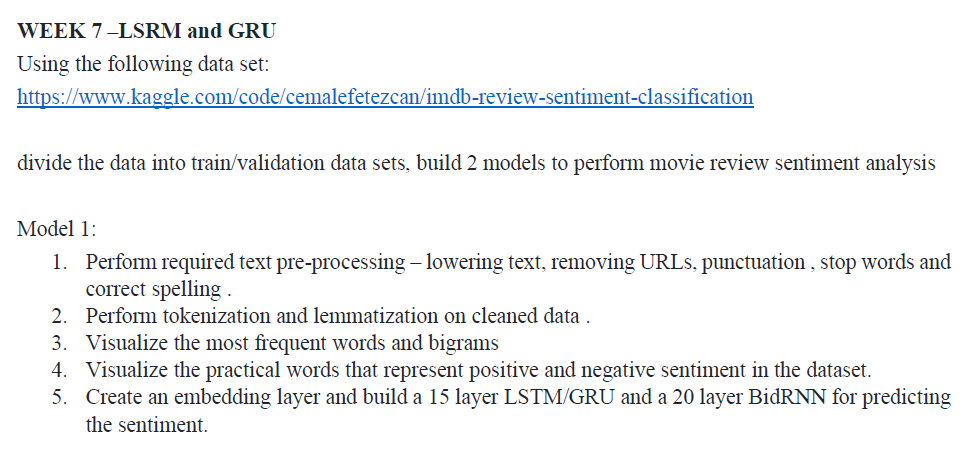

In [76]:
# Import necessary libraries
import re  # Regular expressions
import pandas as pd  # Data manipulation library
import numpy as np  # Numerical computing library
from sklearn.preprocessing import LabelEncoder  # For label encoding
from sklearn.model_selection import train_test_split  # For splitting the dataset
from keras.preprocessing.text import Tokenizer  # For tokenization
#from keras.preprocessing.sequence import pad_sequences  # Sequence padding
import keras  # Import Keras deep learning library
from sklearn.metrics import classification_report  # For generating classification reports
from sklearn.metrics import accuracy_score  # For calculating accuracy
import math  # Mathematical functions
import nltk  # Natural Language Toolkit
import csv  # CSV file handling
import numpy as np  # Numerical computing library
import pandas as pd  # Data manipulation library
from keras.preprocessing.text import Tokenizer  # For tokenization
#from keras_preprocessing.sequence import pad_sequences  # Sequence padding
from keras.models import Sequential  # Keras Sequential model
from keras.layers import Embedding, LSTM, Dense, Dropout  # Deep learning layers
from sklearn.model_selection import train_test_split  # For splitting the dataset
from nltk import FreqDist, bigrams  # Frequency distribution and bigrams
from wordcloud import WordCloud  # Creating word clouds
import matplotlib.pyplot as plt  # Data visualization
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords
from nltk.tokenize import word_tokenize 

In [77]:
# Import necessary libraries
import os  # Operating system-related functions
import zipfile  # Library for working with ZIP files

# Define the path to the ZIP file you want to extract
local_zip = 'archive.zip'

# Create a ZipFile object to read the contents of the ZIP file
zip_ref = zipfile.ZipFile(local_zip, 'r')

# Extract all the contents of the ZIP file to the current directory ('' represents the current directory)
zip_ref.extractall('')

# Close the ZipFile object
zip_ref.close()

In [78]:
tr=pd.read_csv("Train.csv")
tt=pd.read_csv("Test.csv")
val=pd.read_csv("Valid.csv")

In [79]:
df=pd.concat([tr,tt,val])

In [80]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


# Convert to Lowercase

In [81]:
df['text'] = df['text'].str.lower()

# Remove Punctuation

In [82]:
import string
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Remove Special Characters from Text Data

In [83]:
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

# Remove URLs from Text Data

In [84]:
# remove urls
import re
def sentence_rge(data):
        # Define a regex pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    data=re.sub(url_pattern,'',data) # Html taglerini kaldırma
    
  
    return data

df['text']=df['text'].apply(sentence_rge)

In [85]:
df

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1
...,...,...
4995,man i loved this movie this really takes me ba...,1
4996,recovery is an incredibly moving piece of work...,1
4997,you can take the crook out of the joint but it...,1
4998,futz is the only show preserved from the exper...,1


# Removing Stopwords

In [86]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Create a List of Reviews & Labels

In [87]:
reviews = df['text'].tolist()

In [88]:
labels = df['label'].tolist()  # Assuming 'label' is the column containing sentiment labels (e.g., 0 for negative, 1 for positive)

# Tokenize

In [89]:
max_words = 10000  # Define the maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")#out-of-vocabulary (OOV) tokens
tokenizer.fit_on_texts(reviews)  # generates token of words
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size of dataset

In [90]:
df

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
4995,man loved movie really takes back kid days tea...,1
4996,recovery incredibly moving piece work handling...,1
4997,take crook joint seems exceedingly difficult t...,1
4998,futz show preserved experimental theatre movem...,1


In [91]:
# Step 6: Tokenize - Encode the Words
from keras.preprocessing.text import Tokenizer
sequences = tokenizer.texts_to_sequences(reviews)

# Step 7: Tokenize - Encode the Labels
#labels = np.array(labels)
labels= pd.get_dummies(df['label']).values


In [92]:
df

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
4995,man loved movie really takes back kid days tea...,1
4996,recovery incredibly moving piece work handling...,1
4997,take crook joint seems exceedingly difficult t...,1
4998,futz show preserved experimental theatre movem...,1


In [93]:
from keras_preprocessing.sequence import pad_sequences

In [94]:
# Step 8: Analyze Reviews Length
review_lengths = [len(seq) for seq in sequences]
print(review_lengths)
# Step 9: Removing Outliers - Getting rid of extremely long or short reviews
max_review_length = 200  # Define your desired maximum review length
sequences = pad_sequences(sequences, maxlen=max_review_length, padding='post', truncating='post')
sequences

[87, 157, 99, 33, 107, 57, 123, 149, 110, 143, 65, 134, 42, 76, 73, 80, 545, 131, 219, 139, 49, 66, 16, 143, 65, 251, 91, 21, 70, 146, 99, 89, 145, 100, 156, 104, 167, 345, 50, 493, 68, 110, 80, 125, 94, 89, 219, 23, 80, 60, 84, 77, 28, 190, 75, 134, 87, 82, 69, 196, 28, 264, 72, 67, 79, 55, 146, 456, 136, 75, 80, 57, 153, 78, 62, 287, 152, 90, 288, 215, 69, 63, 111, 119, 32, 114, 206, 88, 202, 103, 109, 122, 53, 177, 85, 62, 98, 199, 80, 183, 76, 368, 112, 57, 83, 68, 499, 268, 44, 41, 218, 107, 71, 42, 355, 130, 99, 307, 335, 203, 176, 107, 71, 116, 75, 209, 54, 75, 90, 196, 86, 113, 54, 91, 52, 142, 309, 67, 133, 159, 97, 38, 52, 64, 64, 37, 117, 60, 331, 68, 72, 29, 206, 67, 99, 267, 119, 214, 123, 167, 52, 105, 25, 119, 143, 149, 96, 150, 182, 63, 63, 70, 67, 67, 176, 100, 180, 188, 72, 132, 293, 108, 125, 132, 225, 140, 83, 135, 261, 75, 247, 51, 72, 70, 86, 188, 72, 386, 354, 142, 62, 54, 68, 194, 103, 71, 198, 125, 189, 85, 100, 102, 346, 30, 185, 109, 87, 69, 73, 36, 172, 119,

array([[1958,  834, 9236, ...,    0,    0,    0],
       [ 164,    3,  171, ...,    0,    0,    0],
       [  20,   42,  721, ...,    0,    0,    0],
       ...,
       [  92, 9050, 8336, ...,    0,    0,    0],
       [   1,   43,    1, ...,    0,    0,    0],
       [ 324,  586,  885, ...,    0,    0,    0]])

In [95]:
df

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
4995,man loved movie really takes back kid days tea...,1
4996,recovery incredibly moving piece work handling...,1
4997,take crook joint seems exceedingly difficult t...,1
4998,futz show preserved experimental theatre movem...,1


# Tokenization and Lemmatization

In [96]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

df['text'] = df['text'].apply(tokenize_and_lemmatize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
df

,text,label
0,"[grew, b, 1965, watching, loving, thunderbird,...",0
1,"[put, movie, dvd, player, sat, coke, chip, exp...",0
2,"[people, know, particular, time, past, like, f...",0
3,"[even, though, great, interest, biblical, movi...",0
4,"[im, die, hard, dad, army, fan, nothing, ever,...",1
...,...,...
4995,"[man, loved, movie, really, take, back, kid, d...",1
4996,"[recovery, incredibly, moving, piece, work, ha...",1
4997,"[take, crook, joint, seems, exceedingly, diffi...",1
4998,"[futz, show, preserved, experimental, theatre,...",1


In [98]:
# Calculate the frequency distribution of words
all_words = [word for text in df['text'] for word in text]

fdist = FreqDist(all_words)

In [99]:
all_words

['grew',
 'b',
 '1965',
 'watching',
 'loving',
 'thunderbird',
 'mate',
 'school',
 'watched',
 'played',
 'thunderbird',
 'school',
 'lunch',
 'school',
 'wanted',
 'virgil',
 'scott',
 'one',
 'wanted',
 'alan',
 'counting',
 '5',
 'became',
 'art',
 'form',
 'took',
 'child',
 'see',
 'movie',
 'hoping',
 'would',
 'get',
 'glimpse',
 'loved',
 'child',
 'bitterly',
 'disappointing',
 'high',
 'point',
 'snappy',
 'theme',
 'tune',
 'could',
 'compare',
 'original',
 'score',
 'thunderbird',
 'thankfully',
 'early',
 'saturday',
 'morning',
 'one',
 'television',
 'channel',
 'still',
 'play',
 'rerun',
 'series',
 'gerry',
 'anderson',
 'wife',
 'created',
 'jonatha',
 'frakes',
 'hand',
 'director',
 'chair',
 'version',
 'completely',
 'hopeless',
 'waste',
 'film',
 'utter',
 'rubbish',
 'cgi',
 'remake',
 'may',
 'acceptable',
 'replacing',
 'marionette',
 'homo',
 'sapiens',
 'subsp',
 'sapiens',
 'huge',
 'error',
 'judgment',
 'put',
 'movie',
 'dvd',
 'player',
 'sat',
 'c

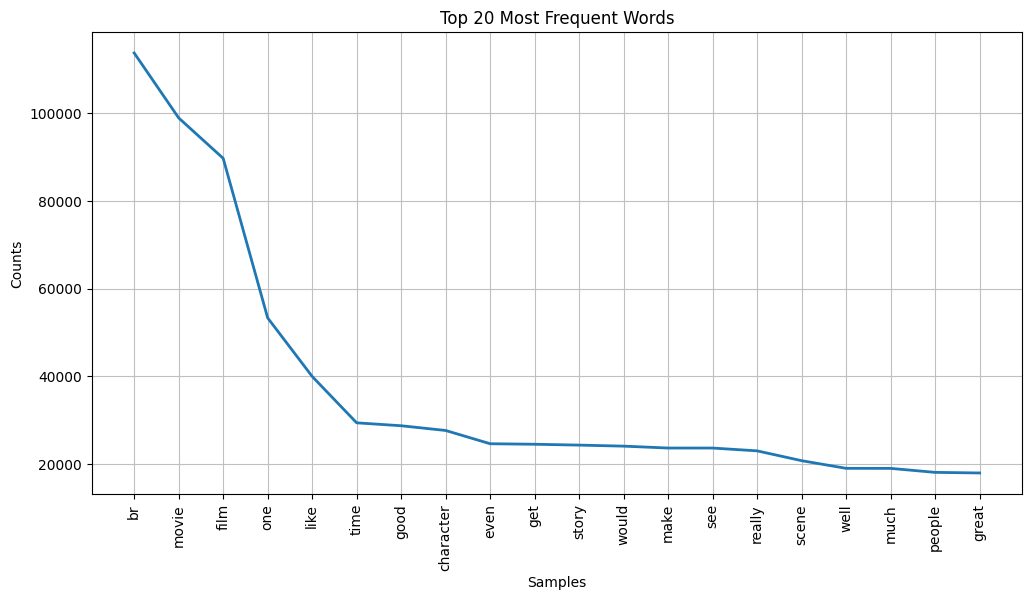

<Axes: title={'center': 'Top 20 Most Frequent Words'}, xlabel='Samples', ylabel='Counts'>

In [100]:
n = 20  # Change n to display a different number of top words
plt.figure(figsize=(12, 6))
fdist.plot(n, title=f"Top {n} Most Frequent Words")

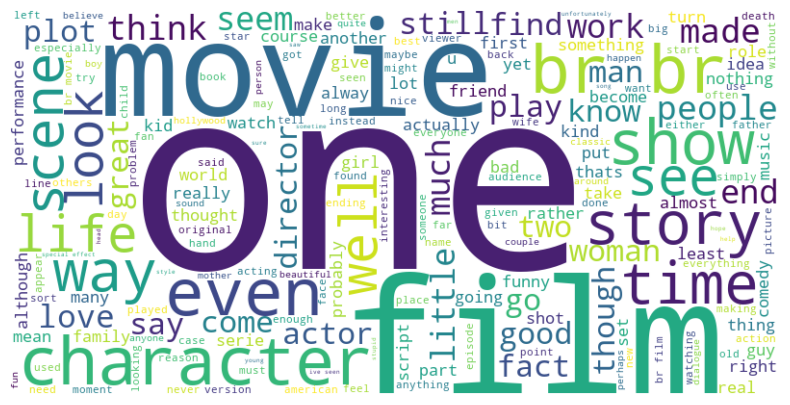

In [101]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [102]:
from nltk import FreqDist, bigrams

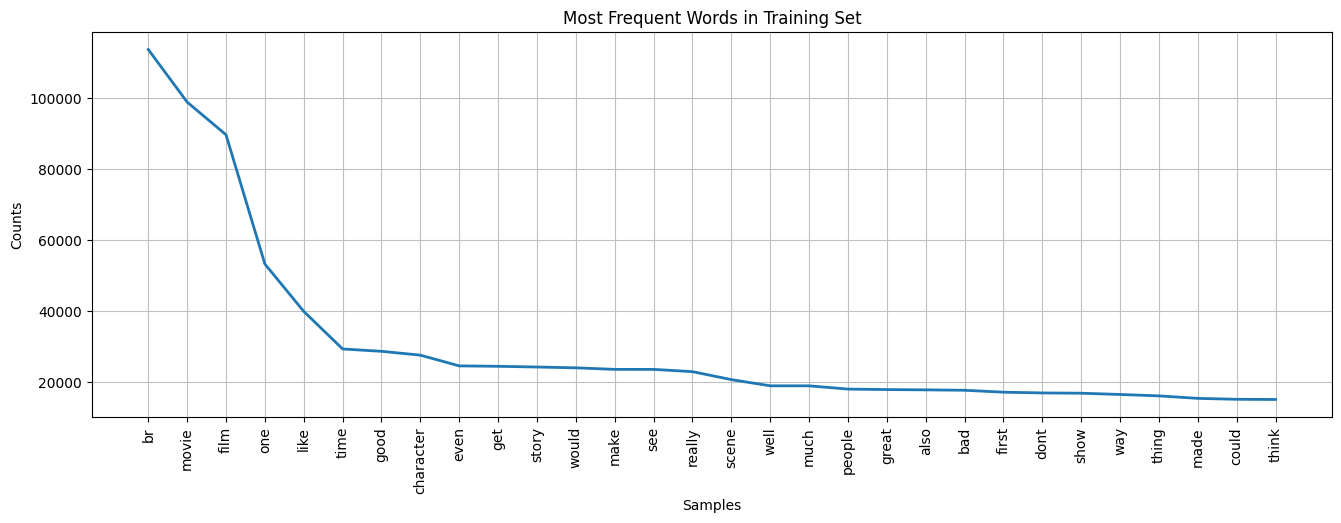

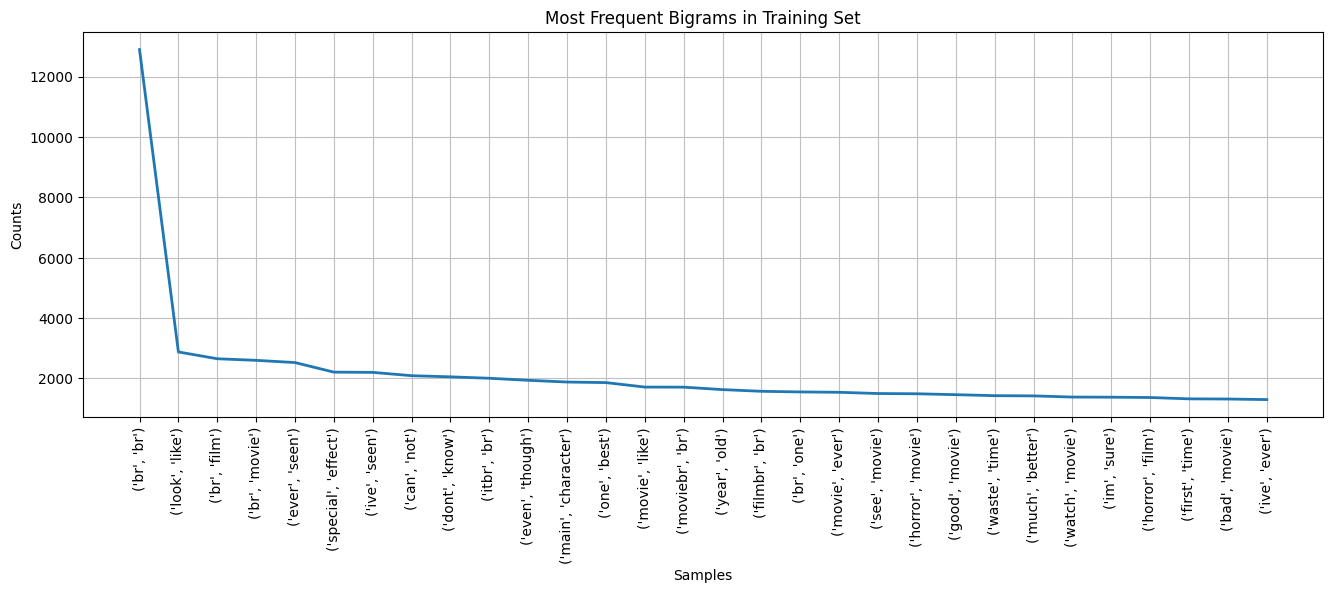

In [103]:

#bigrams 

all_bigrams = list(bigrams(all_words))
plot_most_frequent(all_words, "Most Frequent Words in Training Set")
plot_most_frequent(all_bigrams, "Most Frequent Bigrams in Training Set")


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
# Create a Sequential model
model = Sequential()

# Add an Embedding layer with specified input dimensions, output dimensions, and input length
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))

# Add an LSTM layer with 128 units and return sequences set to False, meaning it won't return sequences but only the final state
model.add(LSTM(128, return_sequences=False))

# Add a Dense (fully connected) layer with 64 units and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5, which helps prevent overfitting
model.add(Dropout(0.5))

# Add a final Dense output layer with 2 units and a sigmoid activation function for binary classification
model.add(Dense(2, activation='sigmoid'))


In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          23097088  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 23,237,058
Trainable params: 23,237,058
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
batch_size = 32
model.fit(X_train, y_train, epochs = 1, batch_size=batch_size, verbose = 2)

1250/1250 - 414s - loss: 0.6865 - accuracy: 0.5450 - 414s/epoch - 331ms/step


In [29]:
#
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 9s 55ms/step - loss: 0.3044 - accuracy: 0.8836
Test Loss: 0.3044, Test Accuracy: 0.8836


In [21]:
# Example of making predictions on user-generated data:

# Define user-generated movie reviews
user_reviews = ["I didn't like the movie at all."]

# Tokenize the user-generated reviews using the same tokenizer used for training
user_sequences = tokenizer.texts_to_sequences(user_reviews)

# Pad the tokenized sequences to the same length as the training data
user_sequences = pad_sequences(user_sequences, maxlen=max_review_length, padding='post', truncating='post')

# Use the trained model to make sentiment predictions on the user-generated data
user_predictions = model.predict(user_sequences)

# Determine sentiment based on the model's prediction
if (np.argmax(user_predictions) >= 0.3):
    print("Positive sentiment")
else:
    print("Negative sentiment")


1/1 [==============================] - 0s 444ms/step
Positive sentiment


In [22]:
import numpy as np

# Predicted probabilities
probabilities = np.array([0.5, 0.4])

# Set the threshold
threshold = 0.5

# Classify based on the threshold
predicted_class = 1 if probabilities[0] >= threshold else 0

# Determine the class label
class_label = 'positive' if predicted_class == 1 else 'negative'

print("Predicted probabilities:", probabilities)
print("Predicted class:", class_label)


Predicted probabilities: [0.5 0.4]
Predicted class: positive


# Build a Bidirectional LSTM model

In [24]:
from tensorflow.keras.layers import Bidirectional

In [25]:
# Create a Sequential model
model = Sequential()

# Add an Embedding layer with specified input dimensions, output dimensions, and input length
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))

# Add the first Bidirectional LSTM layer with 64 units, returning sequences
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Bidirectional LSTM layer

# Add the second Bidirectional LSTM layer with 64 units
model.add(Bidirectional(LSTM(64)))  # Bidirectional LSTM layer

# Add a Dense (fully connected) output layer with 2 units and a sigmoid activation function for binary classification
model.add(Dense(2, activation='sigmoid'))


In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          23097088  
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23,294,978
Trainable params: 23,294,978
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
batch_size = 32
model.fit(X_train, y_train, epochs = 1, batch_size=batch_size, verbose = 2)

1250/1250 - 536s - loss: 0.3816 - accuracy: 0.8347 - 536s/epoch - 429ms/step


In [28]:
#
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 11s 61ms/step - loss: 0.3044 - accuracy: 0.8836
Test Loss: 0.3044, Test Accuracy: 0.8836


In [31]:
#contains information about the training process, such as the loss and accuracy values for each epoch
history1 = model.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 1)

1250/1250 [==============================] - 639s 512ms/step - loss: 0.2447 - accuracy: 0.9057 - val_loss: 0.2916 - val_accuracy: 0.8814


In [32]:
for key in history1.history.keys():
    print(key, ':', history1.history[key])

loss : [0.24468883872032166]
accuracy : [0.9057000279426575]
val_loss : [0.2915648818016052]
val_accuracy : [0.8813999891281128]


In [33]:
from tensorflow.keras.layers import GRU

# Build a GRU model

In [34]:
# Create a Sequential model
model = Sequential()

# Add an Embedding layer with specified input dimensions, output dimensions, and input length
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))

# Add the first GRU (Gated Recurrent Unit) layer with 64 units and return sequences
model.add(GRU(64, return_sequences=True))  # GRU layer

# Add the second GRU layer with 64 units
model.add(GRU(64))  # GRU layer

# Add a Dense (fully connected) output layer with 2 units and a sigmoid activation function for binary classification
model.add(Dense(2, activation='sigmoid'))  # Output layer for binary classification


In [35]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          23097088  
                                                                 
 gru (GRU)                   (None, 200, 64)           37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 23,159,426
Trainable params: 23,159,426
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
batch_size = 32
model.fit(X_train, y_train, epochs = 1, batch_size=batch_size, verbose = 2)

1250/1250 - 356s - loss: 0.6925 - accuracy: 0.5084 - 356s/epoch - 285ms/step


In [37]:
#
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 7s 43ms/step - loss: 0.6875 - accuracy: 0.5248
Test Loss: 0.6875, Test Accuracy: 0.5248


In [39]:
# Create an Embedding Layer
# Define the vocabulary size and embedding dimensions
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Create an Embedding layer with the specified vocabulary size and embedding dimensions
embedding_layer = Embedding(vocab_size, embedding_dim)

# Build a 15-layer LSTM/GRU model
model2 = Sequential()
model2.add(embedding_layer)

# Add 15 LSTM layers with 32 units each, returning sequences
for _ in range(15):
    model2.add(LSTM(32, return_sequences=True))

# Add a Dense (fully connected) output layer with a sigmoid activation function for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
print(model2.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         18044600  
                                                                 
 lstm_18 (LSTM)              (None, None, 32)          17024     
                                                                 
 lstm_19 (LSTM)              (None, None, 32)          8320      
                                                                 
 lstm_20 (LSTM)              (None, None, 32)          8320      
                                                                 
 lstm_21 (LSTM)              (None, None, 32)          8320      
                                                                 
 lstm_22 (LSTM)              (None, None, 32)          8320      
                                                                 
 lstm_23 (LSTM)              (None, None, 32)         

# Build a 20 layer BidRNN model

In [41]:
# Import necessary layers
from tensorflow.keras.layers import Flatten

# Create a Sequential model
model2 = Sequential()

# Add a Flatten layer to convert input to a one-dimensional array
model2.add(Flatten())

# Add an embedding layer (previously defined) for word embeddings
model2.add(embedding_layer)

# Loop to add 20 Bidirectional LSTM layers with 32 units each, returning sequences
for _ in range(20):
    model2.add(Bidirectional(LSTM(32, return_sequences=True)))

# Add a Dense (fully connected) output layer with a sigmoid activation function for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy as the evaluation metric
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
# Python code
df = [
    {"review": "The movie was excellent! The performances were Oscar-worthy.", "sentiment": "positive"},
    {"review": "I really enjoyed the movie. The plot had a few unexpected twists.", "sentiment": "positive"},
    {"review": "This movie was so bad. I walked out halfway through.", "sentiment": "negative"},
    {"review": "I wouldn't recommend this movie to anyone.", "sentiment": "negative"},
    {"review": "One of the best movies I've seen this year. Highly recommend.", "sentiment": "positive"},
    {"review": "Don't waste your time with this movie.", "sentiment": "negative"},
    {"review": "An absolute masterpiece! I can't wait to see it again.", "sentiment": "positive"},
    {"review": "The movie was unoriginal and boring. I'm sorry I watched it.", "sentiment": "negative"},
    {"review": "A captivating portrayal of a love story that will move you to tears.", "sentiment": "positive"},
    {"review": "The plot was predictable and the acting was subpar.", "sentiment": "negative"}
]


In [47]:
df

[{'review': 'The movie was excellent! The performances were Oscar-worthy.',
  'sentiment': 'positive'},
 {'review': 'I really enjoyed the movie. The plot had a few unexpected twists.',
  'sentiment': 'positive'},
 {'review': 'This movie was so bad. I walked out halfway through.',
  'sentiment': 'negative'},
 {'review': "I wouldn't recommend this movie to anyone.",
  'sentiment': 'negative'},
 {'review': "One of the best movies I've seen this year. Highly recommend.",
  'sentiment': 'positive'},
 {'review': "Don't waste your time with this movie.", 'sentiment': 'negative'},
 {'review': "An absolute masterpiece! I can't wait to see it again.",
  'sentiment': 'positive'},
 {'review': "The movie was unoriginal and boring. I'm sorry I watched it.",
  'sentiment': 'negative'},
 {'review': 'A captivating portrayal of a love story that will move you to tears.',
  'sentiment': 'positive'},
 {'review': 'The plot was predictable and the acting was subpar.',
  'sentiment': 'negative'}]

In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...


True

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of each review
for review in test_data:
    # Get the sentiment scores for the review
    sentiment_scores = sia.polarity_scores(review["review"])
    
    # Classify the review as positive or negative based on the compound score
    if sentiment_scores["compound"] >= 0.05:
        predicted_sentiment = "positive"
    else:
        predicted_sentiment = "negative"
    
    # Print the review and the predicted sentiment
    print(f'Review: {review["review"]}\nPredicted Sentiment: {predicted_sentiment}\n')


Review: The movie was excellent! The performances were Oscar-worthy.
Predicted Sentiment: positive

Review: I really enjoyed the movie. The plot had a few unexpected twists.
Predicted Sentiment: positive

Review: This movie was so bad. I walked out halfway through.
Predicted Sentiment: negative

Review: I wouldn't recommend this movie to anyone.
Predicted Sentiment: negative

Review: One of the best movies I've seen this year. Highly recommend.
Predicted Sentiment: positive

Review: Don't waste your time with this movie.
Predicted Sentiment: positive

Review: An absolute masterpiece! I can't wait to see it again.
Predicted Sentiment: positive

Review: The movie was unoriginal and boring. I'm sorry I watched it.
Predicted Sentiment: negative

Review: A captivating portrayal of a love story that will move you to tears.
Predicted Sentiment: positive

Review: The plot was predictable and the acting was subpar.
Predicted Sentiment: negative

